# Preparing feature and labels

이제는 우리가 배운 것은 ML 로 예측하는 것을 해보려고 한다. 

ML 로 예측을 하기 위해서는 data 를 feature, label 로 나눠야된다. 

이러한 경우 feature 는 time series 에서 y 축에 해당하는 애들임을 알면 되겠다. 

**Window Size : 우리가 feature 로써 앞으로 사용하려는 value 의 갯수. **

#### 여기에서 이해 안되는점, 우리ㅣ가 window size = 30 으로 해 두면 그것을 feature 로 사용핟나고 했고 next value 를 label 로 사용한다고 한다. 이게 정확하게 무슨 의미인지 이해가 되지 않음. 

그리고 나서 그 30 개의 feature 를 single label 로 만든다고 한다. 

### dataset = dataset.window(5, shift=1)

로 해두면 5개의 값만 표현하게 되며 값자체를 1 

씩 shift 하게 만든다는 의미이다. 그리고 값이 더이상 존재하지 않게 되면, range 를 0~9 로 두

게 되면, 최종적으로 9만 남게 될때 이제 끝이 나게 되는 것이다.  


### dateaset = dataset.window(5, shift = 1, drop_remainder = True) 

drop_remainder 로 하게 되면, 전에는 1개 짜리가 보이는 경우도 있었는데, 이제는 window size 만큼의 데이터만 보여주게 된다. (truncate ) 한다고 한다. 

이제부터는 쉽다고 한다. 

for window in dataset : print(window.numpy()) 를 하게 되면 numpy list 로 되어있는 상태로 데이터들이 다 다 들어간다고 한다. 

### dataset = dataset.map(lambd window: (window [:-1], window[-1:]))

이제 데이터를 feature 와 label 로 나누는 작업을 하자고 한다. 

numpy list 에서 제일 뒤에있는 것을 feature 로 만드는 것을 한다고 한다. 즉 label 로 만들 것이라고 한다. 

이것은 dataset.map 을 통해서 구현을 할수 있다고 한다. 

### dataset = dataset.shuffle(buffer_size = 10)

shuffle 을 할수도 있다고 한다. buffer_sieze =10 를 하는 이유는 우리는 데이터의 range 가 10 이기 때문...

shuffle 을 진행하게 되면, 그냥 list 내부적으로 뭔가를 건드는 것이 아니라, 그냥 나열이 되어있는 list 들의 순서를 변경하는 것이라고 이해하면 될거 같다. 

### dataset = dataset.batch(2).prefetch(1)

batching 을 진행할 수 있다고 한다. batch the data in the size of 2..... 

x 안에 두개의 리스트가 나오며, y 에도 두개의 label 이 나오게 되는 것이다. 



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [2]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
    print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [5]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

SyntaxError: invalid syntax (<ipython-input-5-aa19502b18f6>, line 5)

In [6]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

SyntaxError: invalid syntax (<ipython-input-6-28fa158ac151>, line 5)

In [7]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())


[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [8]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

(array([0, 1, 2, 3]), array([4]))
(array([1, 2, 3, 4]), array([5]))
(array([2, 3, 4, 5]), array([6]))
(array([3, 4, 5, 6]), array([7]))
(array([4, 5, 6, 7]), array([8]))
(array([5, 6, 7, 8]), array([9]))


In [9]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(), y.numpy())


(array([4, 5, 6, 7]), array([8]))
(array([3, 4, 5, 6]), array([7]))
(array([2, 3, 4, 5]), array([6]))
(array([5, 6, 7, 8]), array([9]))
(array([1, 2, 3, 4]), array([5]))
(array([0, 1, 2, 3]), array([4]))


In [10]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())


('x = ', array([[2, 3, 4, 5],
       [1, 2, 3, 4]]))
('y = ', array([[6],
       [5]]))
('x = ', array([[3, 4, 5, 6],
       [5, 6, 7, 8]]))
('y = ', array([[7],
       [9]]))
('x = ', array([[0, 1, 2, 3],
       [4, 5, 6, 7]]))
('y = ', array([[4],
       [8]]))


# Sequence bias 

ordering 한 것을 select 할때 영향을 준다는 것이 sequence bias 의 의미이다. 익숙한 것을 뽑아 주고 싶은 마음이 있다고 한다. 

그래서 항상 shuffle 을 진행하는 것이라고 한다. 

# Feeding windowed dataset into nerual Network

여기에서도 전과 비슷하게 window 라는 것을 이용해서 진행할 것이라고 한다.그냥 함수 만드는 것에 대해서 얘기 잠간 했다. 딱히 NN 에 넣는 작업은 없었다. 

# Single layer neural network

linear regression 을 사용할 것이라고 한다. 사용하는 이유에 대해서는 정확하게 나오지 않았고, 

그냥 심플하면서 효과적인 방법을 사용할 것이라고 말을 해 두었다. 

코드에서 layer 0 라는 것을 설정한다고 한다. 

### l0 = tf.ekras.layers.Dense(1, input_shape = [window_size]) 
나중에 Learned weight 를 뽑아 낼 것이라고 한다. 

이상하게 이번에는 Layer 가 하나밖에 없는 것으로 neural network 를 구현하고자 한다. 

### Q's더 추가 하는 방법은 없는 것인가? 

verbose : display 되는 epoch 의 갯수를 의미하죠? 

### machine learning on time windows

value on the horizontal axis which is commonly called the x-axis, its' the value of the time series at that point on the horizontal axis. So the value at time t0, which is 20 steps before the current value is called x0, and t1 is called x1, etc. Similarly, for the output, which we would then consider to be the value at the current time to be the y. 

# prediction

아 ! linear regression 을 언급한 이유가, 우리가 weight 를 이용해서 regression 처럼 보이게 만들것이라는 것이구나! 

weight 는 그럼, 그 timestamp 에 해당하는 x 값과 곱하고 더하는 방향으로 y 값을 예측하는 것이다.  y = w0x0+w1x1+...x19w19+b (bias_) 

print(series[1:21] 을 하게 되면, 20x 값을 알수 있게 되는 것이다. 

model.predict(series[1:21][np.newaxis]) 을 하게 되면, 학습을 진행하는 것이다. 

forecast 라는 것 자체가 미래 예측하는 것을 의미하는 것이다. 그래서 forecast 라는 리스트를 새로 만들어서, 아에 그래프가 나오도록만들수도 있는 것이다. 

여태는 계속해서 single layer 에 애해서만 진행을 하고 있다. 왠지는 모르겠네... 

아 다음부터 DNN 을 한다고 한다 ! 

코드를 직접 돌린다고 해도 , MSE 가 다를 수도 있다. 왜냐하면 noise 를 생성할때 임의로 생성이 되기 때문이다. 



In [11]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [13]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [14]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [15]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[-0.07449463],
       [ 0.00055847],
       [ 0.0706593 ],
       [ 0.03450776],
       [-0.02344535],
       [-0.01600871],
       [-0.00403608],
       [ 0.0074815 ],
       [-0.0399819 ],
       [ 0.10656881],
       [-0.03324234],
       [-0.029985  ],
       [-0.11413685],
       [ 0.1159035 ],
       [ 0.01686029],
       [ 0.09906794],
       [-0.02463818],
       [ 0.18609957],
       [ 0.26329064],
       [ 0.44711637]], dtype=float32), array([0.01559194], dtype=float32)]


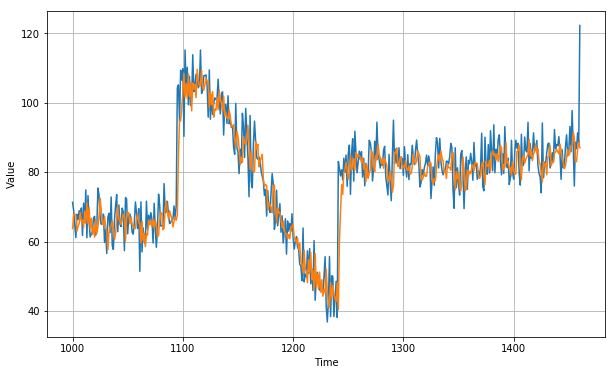

In [16]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)



# Deep neural network training, tuning and prediction

linear regression 을 사용할 것이라고하며, dense layer = 3 개로 전과는 다르게 되어있다. 

dataset 은 항상 window_dataset 형태로 넣는 것 처럼 보인다. 

input_shape = window_size 으로 항상 한정이 되어있는 것 같음.. 

그래프의 형태가 이상하면 짤라서 펼쳐서 볼 수 있는 방법이 있다. 